# Pick Source Times

### Importing Packages

Note that you typically say `import x as y`, where you can create a shortcut name `y` for whatever package `x` that you import. If you only need one function from a package, you can also say `from x import y`. For example, you can say `import obspy` in which case each function you use will need to look like `obspy.read()`, `obspy.UTCDateTime()`, etc., or you can say `from obspy import read` and then you will only need to say `read()` to call that function. I recommend only using `from x import y` if you know you won't be using any other functions from that package. But use whatever is easiest for you! These notes are just to help you customize any Jupyter notebooks you use in the future.

In [ ]:
## If you get an error saying you cannot import a package, it's because you haven't installed it (most packages are installed on the classic Jupyter server, but the updated one
## might only have basics like numpy, matplotlib, etc.

## So if you get that error, you want to use 'pip install ____' like below.

# pip install obspy

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import obspy

## View Miniseed File

Start by viewing the entire miniseed file. This will let you quickly see if you're loading in the file properly.

There are **three** inputs required here:
- `fname` - Copy the path to the miniseed file. Note that the majority of the path will be the same each time, it's just the serial number and date of the test (e.g., '453000843/20220516175900') that changes each time.
- `source_name` - This will be the source you're picking the time for. Look at the Newberry Interactive Layout PDF to help you decide on which sensor/source location pairing you need.
- `start_time` - Refer to the Excel datasheets to find the start time for each source. You only need to paste in the start time since I calculate the end time as one second after the start time later. 

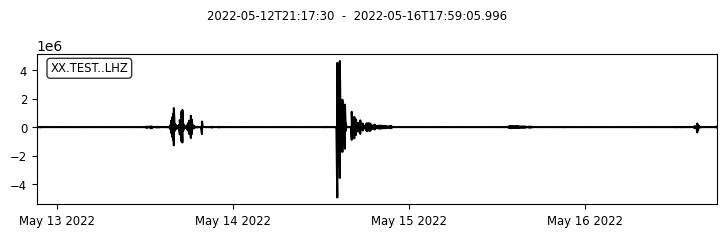

In [4]:
%matplotlib inline

fname = '../projects/PRJ-3521/Raw Field Data/SmartSolo_Raw Field Data/453000843/20220516175900/seis000Z.MiniSeed'
source_name = 'A01'
start_time = "2022-05-16T15:18:28"

stream = obspy.read(fname)
fig = stream.plot()

Now let's trim the full miniseed file and just look at the approximate times listed for each source.

We're using the previously defined start_time and the end time is calculated by adding one second to the chosen start time. Make sure the plot shows you the whole signal! You shouldn't have to add more than one second, but if you do, this is changed where it says `edt = sdt + 1`.

         network: XX
         station: TEST
        location: 
         channel: LHZ
       starttime: 2022-05-16T15:18:28.000000Z
         endtime: 2022-05-16T15:18:29.000000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 251
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 2, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 115347456})
      processing: ['ObsPy 1.3.0: trim(endtime=None::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2022, 5, 16, 15, 18, 28))', 'ObsPy 1.3.0: trim(endtime=UTCDateTime(2022, 5, 16, 15, 18, 29)::fill_value=None::nearest_sample=True::pad=False::starttime=None)']


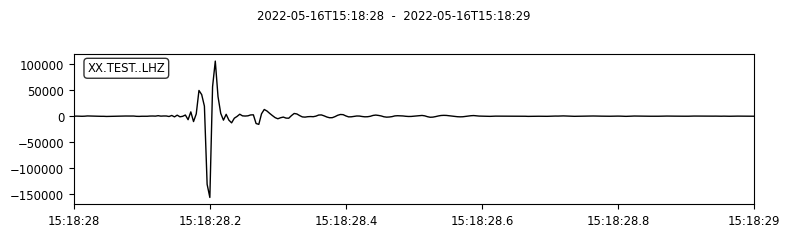

In [5]:
sdt = obspy.UTCDateTime(start_time)
edt = sdt + 1

st_trim = obspy.read(fname, starttime=sdt, endtime=edt)
print(st_trim[0].stats)
fig = st_trim.plot()

## Pick Start Time

**This is no longer interactable. 

New instructions:
- Plot the time signal and make sure you can clearly see the start of the signal + the peaks in amplitude (refer to figure below).
- Type in a guess for your "picked_time" and see where the red circle plots on the signal. 
- Keep adjusting "picked_time" as much as needed (running the same cell for each iteration) until the red circle is at the beginning of the signal.
- Once you're happy with the time, move to the next cell and make sure the plotted trimmed signal makes sense.

Reminder: The start of the signal is usually defined as where the "first major departure" occurs. Essentially you will see a noisy signal for a while, then a sharp departure from 0 where the signal begins. I included a very simple drawing here to demonstrate. While this is subjective, multiple people picking a start time should have very similar times.

<div>
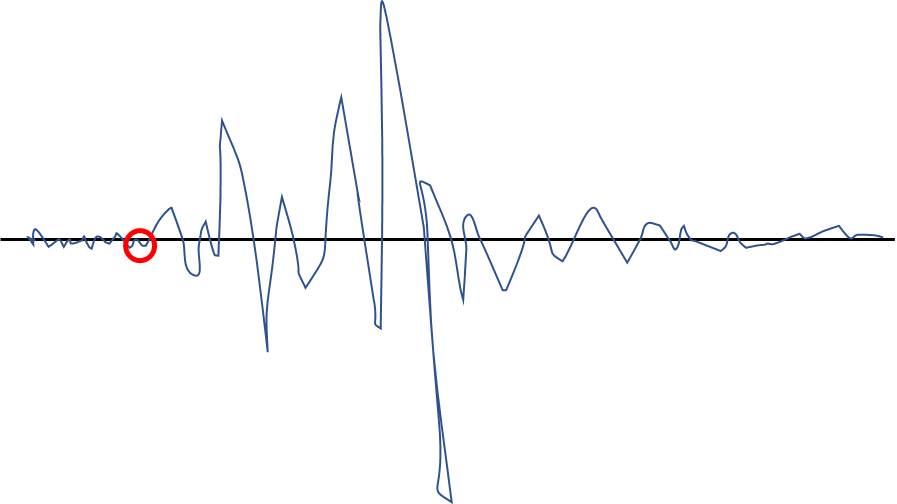
</div>

2022-05-16T15:18:28.156000Z


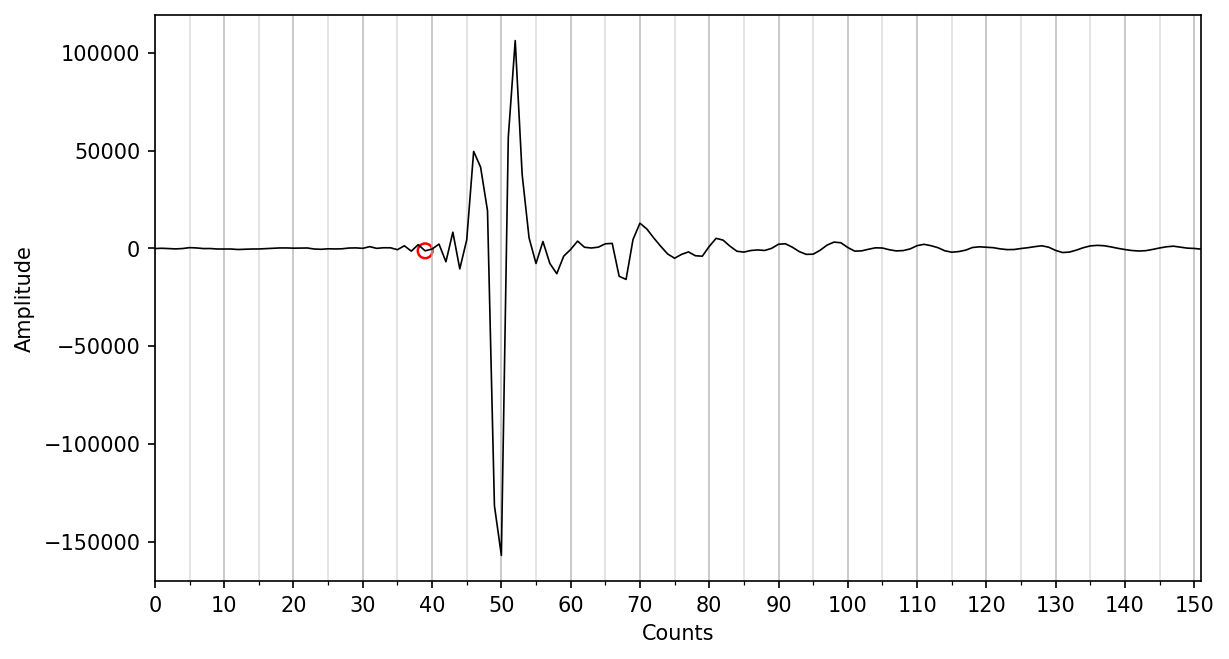

In [7]:
picked_time = 39 # counts

fig, ax = plt.subplots(figsize=(9, 5), dpi=150)
ax.plot(range(0, len(st_trim[0].data)), st_trim[0].data, color='k', linewidth = 0.8)
ax.set_xlim(0, len(st_trim[0].data)-100)
ax.scatter(picked_time, st_trim[0].data[int(round(picked_time,0))], marker = 'o', s = 50, facecolors='none', color='r', linewidth = 1.2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_xlabel('Counts')
ax.set_ylabel('Amplitude')
ax.grid(visible=True, which = 'major', axis = 'x', alpha = 0.8)
ax.grid(visible=True, which = 'minor', axis = 'x', alpha = 0.4)


sampling_rate = 250 # counts/s
true_time = picked_time/sampling_rate # s
new_sdt = sdt+true_time
print(new_sdt)

Now we plot our signal again using our new start time to check that we selected a good time.

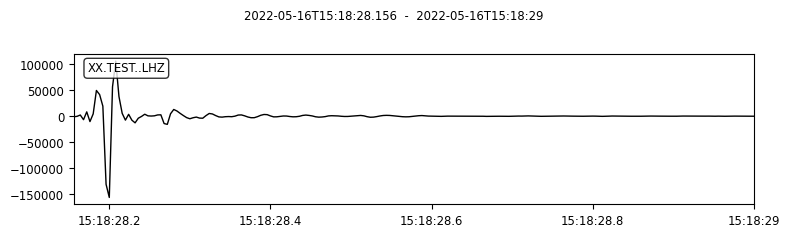

In [8]:
%matplotlib inline

st_trim_new = obspy.read(fname, starttime=new_sdt, endtime=edt)
fig = st_trim_new.plot()

## Save Times

Once you're happy with the time you've chosen, move on to the next cell. You will need to initialize a csv file using Excel. This cell will then open your csv file, save your location name and its associated start time to a row, and then close the csv file. 

I recommend double-checking every once in a while that you're still saving each location/start time to a new row. 

In [25]:
save_time = str(start_time)

f = open('example_summary.csv', 'a', newline="")
f.write(f'\n{source_name}, {save_time}') 
f.close()